In [22]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import os
import csv
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cdf = pd.read_csv(city_data_to_load)
rdf = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(rdf, cdf, on="city", how="outer")


# Display the data table for preview
merge_table.head()
#print(gbdf.head())

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
#finding the average fare per city
# total number of rides per city
# total number of drivers per city
#the city type

gbdf = merge_table.groupby("city")

ave_fare_per_city = gbdf.mean()

ridenum = []
citytype = []
fare_by_city = []
citygroup = cdf.groupby("city")
for city, city_df in gbdf:
    ridenum.append(len(gbdf.get_group(city)))
    citytype.append(gbdf.get_group(city).iloc[0,5])
    
    
ave_fare_per_city["ridespc"] = ridenum

ave_fare_per_city["city type"] = citytype

print(ave_fare_per_city.head())



urban1 = ave_fare_per_city.loc[ave_fare_per_city["city type"] == "Urban",:]
suburban1 = ave_fare_per_city.loc[ave_fare_per_city["city type"] == "Suburban",:]
rural1 = ave_fare_per_city.loc[ave_fare_per_city["city type"] == "Rural",:]
print(urban1.head())

ave_fare_urban = urban1["fare"].mean()
rides_per_city_urban = urban1["ridespc"].sum()
drivers_per_city_urban = urban1["driver_count"].sum()


ave_fare_suburban = suburban1["fare"].mean()
rides_per_city_suburban = suburban1["ridespc"].sum()
drivers_per_city_suburban = suburban1["driver_count"].sum()


ave_fare_rural = rural1["fare"].mean()
rides_per_city_rural = rural1["ridespc"].sum()
drivers_per_city_rural = rural1["driver_count"].sum()

ave_fare = [ave_fare_urban,ave_fare_suburban,ave_fare_rural]
rides_per_city = [rides_per_city_urban,rides_per_city_suburban,rides_per_city_rural]
drivers_per_city = [drivers_per_city_urban,drivers_per_city_suburban,drivers_per_city_rural]


bubble_df = pd.DataFrame({"type":["Urban","Suburban","Rural"],
              "Average Fare":ave_fare,
              "Rides Per City":rides_per_city,
              "Drivers Per City":drivers_per_city},index=[0,1,2])


citylist = merge_table["city"].unique()

bubdf = pd.DataFrame({"City":citylist,
              "City Fare": cityfarelist,
              "Rides Per City" : cityridelist,
              "Drivers Per City": drivers_per_city_list})



print(bubdf)



                    fare       ride_id  driver_count  ridespc city type
city                                                                   
Amandaburgh    24.641667  5.359336e+12          12.0       18     Urban
Barajasview    25.332273  4.676968e+12          26.0       22     Urban
Barronchester  36.422500  4.460796e+12          11.0       16  Suburban
Bethanyland    32.956111  5.842550e+12          22.0       18  Suburban
Bradshawfurt   40.064000  3.735294e+12           7.0       10     Rural
                      fare       ride_id  driver_count  ridespc city type
city                                                                     
Amandaburgh      24.641667  5.359336e+12          12.0       18     Urban
Barajasview      25.332273  4.676968e+12          26.0       22     Urban
Carriemouth      28.314444  5.184855e+12          52.0       27     Urban
Christopherfurt  24.501852  4.582307e+12          41.0       27     Urban
Deanville        25.842632  4.901508e+12          49

In [5]:

cityfarelist = []
cityridelist = []
drivers_per_city_list = []
for city in citylist:
    cityfarelist.append(merge_table.loc[merge_table["city"] == city,:]["fare"].sum())
    cityridelist.append(merge_table.loc[merge_table["city"] == city,:].iloc[0,4])
    drivers_per_city_list.append(len(merge_table.loc[merge_table["city"] == city,:]))
    
    
#drivers_per_city_list

In [6]:
merge_table.loc[merge_table["city"] == city,:]#.iloc[0,4]



,city,date,fare,ride_id,driver_count,type
2366,West Heather,2018-03-12 04:22:26,26.55,7035849392668,4,Rural
2367,West Heather,2018-02-22 09:01:37,17.40,8702491506161,4,Rural
2368,West Heather,2018-02-22 01:46:43,33.38,5551691454078,4,Rural
2369,West Heather,2018-02-04 16:29:23,13.97,7118893881453,4,Rural
2370,West Heather,2018-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2018-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2018-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2018-02-02 06:28:04,53.07,2462950442268,4,Rural
2374,West Heather,2018-05-07 19:22:15,44.94,4256853490277,4,Rural


In [9]:
bubdf.head()
bubdf["city type"] = ""
bubdf["color"] = ""
ct = 0
for city in bubdf["City"]:
    typecity = ave_fare_per_city.loc[city,"city type"]
    bubdf.loc[bubdf["City"]==city,"city type"] = typecity
    if typecity == "Urban":
        bubdf.loc[bubdf["City"]==city,"color"] = "Gold"
    elif typecity == "Suburban":
        bubdf.loc[bubdf["City"]==city,"color"] = "SkyBlue"
        
    else:
        bubdf.loc[bubdf["City"]==city,"color"] = "Coral"

In [21]:
bubdf.head()
#ave_fare_per_city.loc["Amandaburgh","city type"]
#citytype

newdf = pd.DataFrame({
    "type":["Urban","Suburban","Rural"],
    "color":["Gold","SkyBlue","Coral"]
})

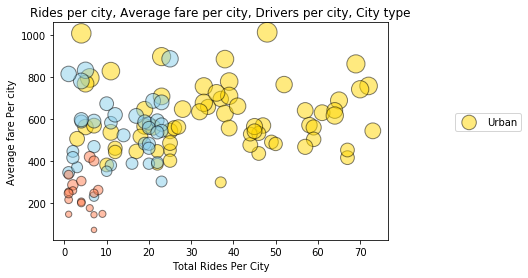

In [42]:
#bubble_df.plot.scatter(x = 'Rides Per City',y = 'Average Fare')
#color_list = ["Gold", "SkyBlue", "Coral"]
plt.scatter(bubdf["Rides Per City"], bubdf["City Fare"], marker="o", facecolors="red", edgecolors="black",
            s=10*bubdf["Drivers Per City"], alpha=0.5,c=bubdf["color"])

plt.title("Rides per city, Average fare per city, Drivers per city, City type")
plt.xlabel("Total Rides Per City")
plt.ylabel("Average fare Per city")
aaa = []
for i in range(0,len(newdf.index)):
    aaa.append(mpatches.Patch(color=newdf["color"][i],
                             alpha = 0.5,
                             label = newdf["type"][i]))

x,y = bubdf["Rides Per City"], bubdf["City Fare"]
#for i,txt in enumerate(bubdf["City"]):
#    plt.annotate(txt, (x[i], y[i]))
    
plt.legend(["Urban","Suburban","Rural"] ,loc=(1.2,0.5))

ct = 0
qq = []





In [30]:
# sky Blue means suburban 
# Coral means rural

In [19]:
#The urban cities are the ones where there are the most rides. I may be possible for the amount of rides being
#shared to have an inpact on the average fare per city. When there is more demand for a ride shar then the price
#will increase
#
# 

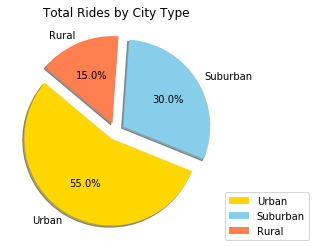

In [43]:
#pie chart for the total rides by city type
len(ave_fare_per_city["city type"].unique())
# Labels for the sections of our pie chart
labels = []
labels = ave_fare_per_city["city type"].unique()

# The values of each section of the pie chart
city_type_list = []
city_fares = []
city_rides = ave_fare_per_city["ridespc"]
fare_per_city = []


for label in labels:
    a = ave_fare_per_city.loc[ave_fare_per_city["city type"] == label,:]
    city_type_list.append(len(a))
   

sizes = city_type_list

 
colors = ["Gold", "SkyBlue", "Coral"]

explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides by City Type")
plt.legend(["Urban","Suburban","Rural"], loc=(1,0))


In [44]:
# pie chart for total fares by city type and total drivers by city type
labels = ave_fare_per_city["city type"].unique()

thedf = merge_table.groupby("type")
urban = thedf.get_group(labels[0])
suburban = thedf.get_group(labels[1])
rural = thedf.get_group(labels[2])


pfare_by_city_type = []
pfare_by_city_type.append( urban["fare"].sum())
pfare_by_city_type.append(suburban["fare"].sum())
pfare_by_city_type.append(rural["fare"].sum())

p_drivers_by_city_type = []
p_drivers_by_city_type.append(urban["driver_count"].sum())
p_drivers_by_city_type.append(suburban["driver_count"].sum())
p_drivers_by_city_type.append(rural["driver_count"].sum())

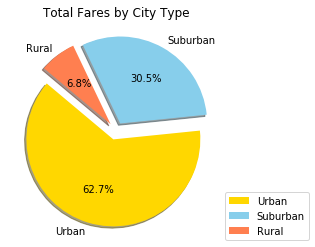

In [47]:
plt.pie(pfare_by_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares by City Type")
plt.legend(["Urban","Suburban","Rural"], loc=(1,0))

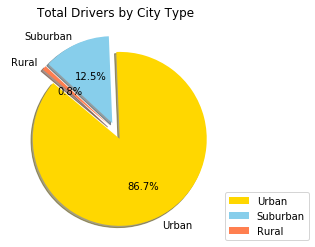

In [48]:
plt.pie(p_drivers_by_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Drivers by City Type")
plt.legend(["Urban","Suburban","Rural"], loc=(1,0))

## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()